In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\Nat\\Downloads\\кальций_и_смерть\\water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

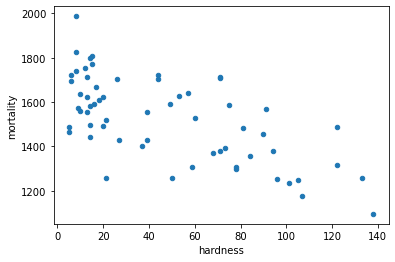

In [11]:
# визуализируем взаимосвязь  кальция и количества смертей
# видим обратную линейную зависимость - с ростом кальция в воде уменьшается среднегодовая смертность
df.plot(kind='scatter', x='hardness', y='mortality')

In [12]:
# считаем КК  Пирсона и видим среднюю обратную связь
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [13]:
# КК Спирмана тоже показывает среднюю обратную связь
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [14]:
# КК Кендалла показывает нам связь послабее
df[['hardness', 'mortality']].corr(method= 'kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


In [29]:
# на всякий случай посмотрим выбросы
# найдем межквартильный размах
q1_p = df['mortality'].quantile(0.25)
q3_p = df['mortality'].quantile(0.75)
IQR_p = q3_p - q1_p
lower_bound_p = q1_p - (IQR_p*1.5)
upper_bound_p = q3_p + (IQR_p*1.5)
remove_outliers_p = df[df['mortality'].between(lower_bound_p,upper_bound_p, inclusive = True )]

# выбросы (объединяем исходный датафрейм с датафреймом межквартильного размаха и удаляем дубликаты )
remove_outliers_p = pd.concat([df, remove_outliers_p]).drop_duplicates(keep=False)
remove_outliers_p['mortality']
# выбросов нет??

Series([], Name: mortality, dtype: int64)

In [30]:
bp = df[['hardness','mortality']]
bp.head()

,hardness,mortality
0,105,1247
1,17,1668
2,5,1466
3,14,1800
4,18,1609


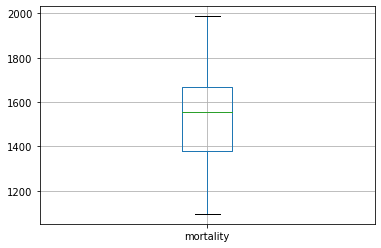

In [31]:
bp = bp.boxplot(column = 'mortality')
# точно нету выбросов :)),  мне показалось

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
X = df[['hardness']]
y = df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train.shape
y_train.shape

(54,)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
model.coef_

array([-3.20724625])

In [7]:
model.intercept_

1679.9023559819332

In [15]:
y_pred = model.predict(X_test)
y_pred

array([1343.14149971, 1647.82989348, 1635.00090848, 1538.78352097,
       1429.73714847, 1615.75743098, 1253.3386047 ])

In [108]:
X_test['y_pred'] = y_pred
X_test['y_test'] = y_test
X_test.head()

<ipython-input-108-0e2acf73cb2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['y_pred'] = y_pred
<ipython-input-108-0e2acf73cb2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['y_test'] = y_test


,hardness,y_pred,y_test
45,8,1673.125645,1987
23,9,1671.302930,1574
43,14,1662.189355,1444
36,6,1676.771075,1724


In [16]:
# Коэфф-нт детерминации
model.score(X_test, y_test) 

0.6172236784691867

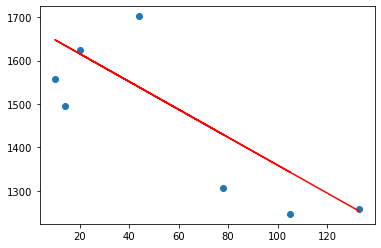

In [17]:
# визуализация ошибок
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

In [8]:
# разделим датафрейм
South = df[df.location == 'South']
North = df[df.location == 'North']

In [40]:
South.info()  # 26 строк для анализа очень мало

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26 non-null     int64 
 1   location    26 non-null     object
 2   town        26 non-null     object
 3   mortality   26 non-null     int64 
 4   hardness    26 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

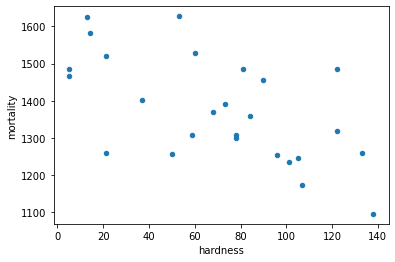

In [18]:
South.plot(kind='scatter', x='hardness', y='mortality') # линейная зависимость прослеживается

<AxesSubplot:>

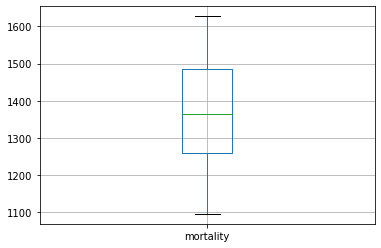

In [19]:
South.boxplot(column = 'mortality') # без выбросов

In [20]:
South[['hardness', 'mortality']].corr() # КК Пирсона

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [21]:
South[['hardness', 'mortality']].corr(method = 'spearman') # КК Спирмана

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [41]:
X = South[['hardness']]
y = South['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train.shape
y_train.shape

(23,)

In [10]:
model_S = LinearRegression()
model_S.fit(X_train, y_train)

LinearRegression()

In [11]:
model_S.coef_

array([-3.20724625])

In [12]:
model_S.intercept_

1679.9023559819332

In [13]:
y_pred = model_S.predict(X_test)
y_pred

array([1343.14149971, 1647.82989348, 1635.00090848, 1538.78352097,
       1429.73714847, 1615.75743098, 1253.3386047 ])

In [14]:
# Коэфф-нт детерминации
model_S.score(X_test, y_test) 

0.6172236784691867

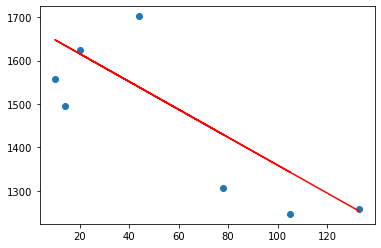

In [15]:
# визуализация ошибок
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [51]:
North.info() # здесь 35  строк, что тоже не густо, учитывая один выброс

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35 non-null     int64 
 1   location    35 non-null     object
 2   town        35 non-null     object
 3   mortality   35 non-null     int64 
 4   hardness    35 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

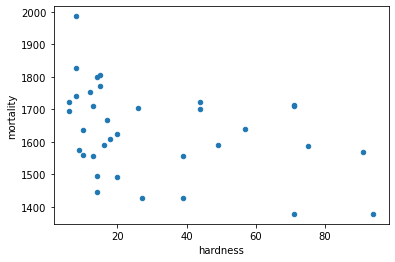

In [41]:
North.plot(kind='scatter', x='hardness', y='mortality')

<AxesSubplot:>

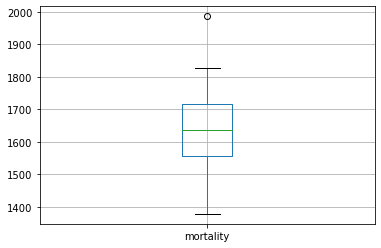

In [42]:
# нашли один выброс
North.boxplot(column = 'mortality')

In [55]:
North[['hardness', 'mortality']].corr() # тут связь еще слабее

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [69]:
X = North[['hardness']]
y = North['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train.shape
y_train.shape

(31,)

In [70]:
model_N = LinearRegression()
model_N.fit(X_train, y_train)

LinearRegression()

In [71]:
model_N.coef_

array([-1.822715])

In [72]:
model_N.intercept_

1687.7073646127963

In [73]:
y_pred = model_N.predict(X_test)
y_pred

array([1673.12564463, 1671.30292963, 1662.18935464, 1676.77107462])

In [74]:
# Коэфф-нт детерминации показал нам, что связь почти отсутствует
model_N.score(X_test, y_test) 

0.032340393386281474

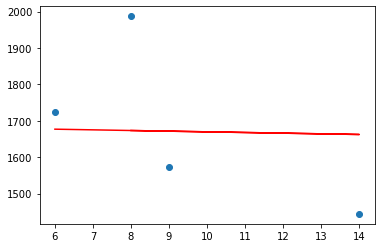

In [76]:
# визуализация ошибок
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

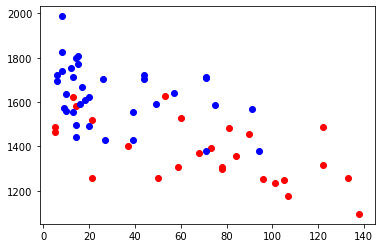

In [105]:
plt.scatter(South['hardness'],South['mortality'],  color = 'red')
plt.scatter(North['hardness'],North['mortality'],  color = 'blue')

In [14]:
# результаты зависят от параметра test_size. Напрашивается только один вывод -  разбивая данные на юг и север мы получаем 
# очень мало строк  для нормального анализа

data = {'test_size':['0.30', '0.20', '0.10'],
        'mortality':[0.504649061101, 0.509967940803, 0.61722367846],
        'mortality South':[-2.55192230123, -1.93001744065, 0.77242123531],
        'mortality North': [0.01888530428, -0.181015395188, 0.032340393386]}
df = pd.DataFrame(data)
df

,test_size,mortality,mortality South,mortality North
0,0.30,0.504649,-2.551922,0.018885
1,0.20,0.509968,-1.930017,-0.181015
2,0.10,0.617224,0.772421,0.032340


Добрый день, Олег, прокомментруйте пожалуйста отрицательные значения коэффициента. Где ошибка? Мало данных?